In [4]:
from __future__ import division
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pylab as plt
from IPython.display import Image
%matplotlib inline

# Rosenblatt's Perceptron

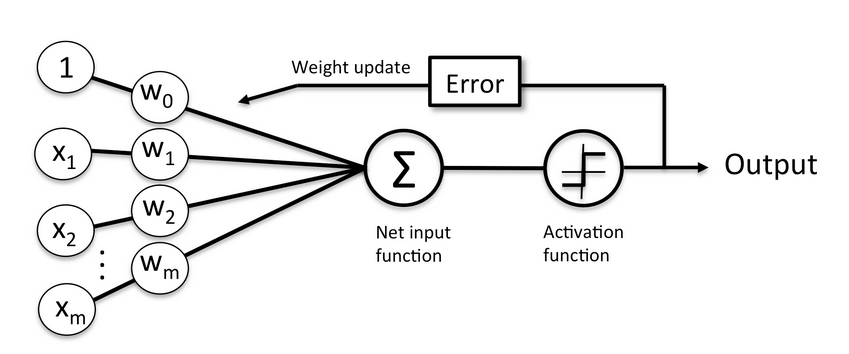

In [9]:
Image(filename='../../../Pictures/percep1.png', width=600) 

In [169]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ----------
    eta : float
        Learning rate between 0.0 and 1.0
    n_inter : int
        Passes over the training dataset.

    Attributes
    ----------
    w_ : 1d array 
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """

    def __init__(self, eta=0.01, n_iter=50, random_seed=1):
        self.random_seed = random_seed
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_futures]
            Training vectors, where n_samples 
            is the number of samples and
            n_features is the number of features
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object
        """
#         self.w_ = np.zeros(1 + X.shape[1])
        rgen = np.random.RandomState(self.random_seed)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Iris Dataset

In [16]:
iris = datasets.load_iris()
print iris.target_names
df = pd.DataFrame(iris.data,columns=iris.feature_names)


['setosa' 'versicolor' 'virginica']


In [17]:
X = df.iloc[:100,[0,2]].values
y = np.where(iris.target[:100]==0,-1,1)

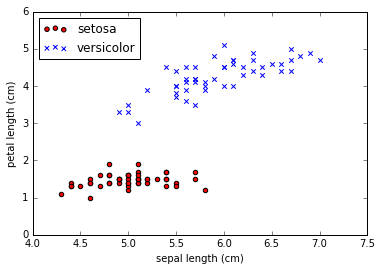

In [18]:
# plt.figure(figsize=(10,7))
plt.scatter(X[:50,0],X[:50,1], c='r', marker='o', label= iris.target_names[0])
plt.scatter(X[50:,0],X[50:,1], c='b', marker='x', label= iris.target_names[1])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.legend(loc=2);

## Implementation

In [226]:
# Train the perceptron algoritm
ppn = Perceptron(n_iter=10)
ppn.fit(X,y)

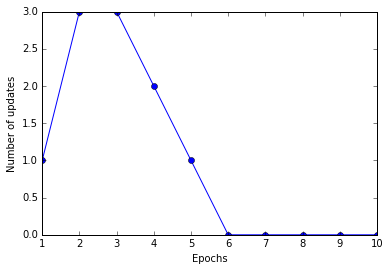

In [227]:
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');

In [66]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('r','b','lg','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution)) 

    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

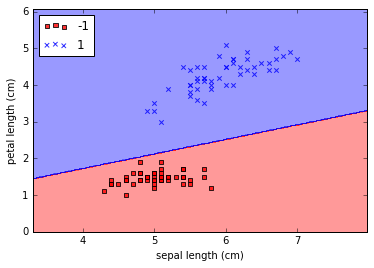

In [229]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.legend(loc=2);

# Adaptive Linear Neuron (Adaline) Rule

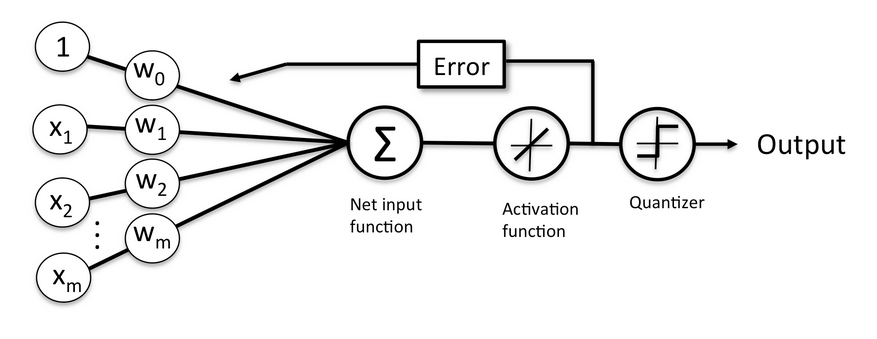

In [10]:
Image(filename='../../../Pictures/percep2.png', width=600) 

In [22]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ----------
    eta : float
        Learning rate between 0.0 and 1.0
    n_inter : int
        Passes over the training dataset.

    Attributes
    ----------
    w_ : 1d array 
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """

    def __init__(self, eta=0.01, n_iter=50, random_seed=1):
        self.random_seed = random_seed
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_futures]
            Training vectors, where n_samples 
            is the number of samples and
            n_features is the number of features
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object
        """
#         self.w_ = np.zeros(1 + X.shape[1])
        rgen = np.random.RandomState(self.random_seed)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)


class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Implementation

#### Different learning rates

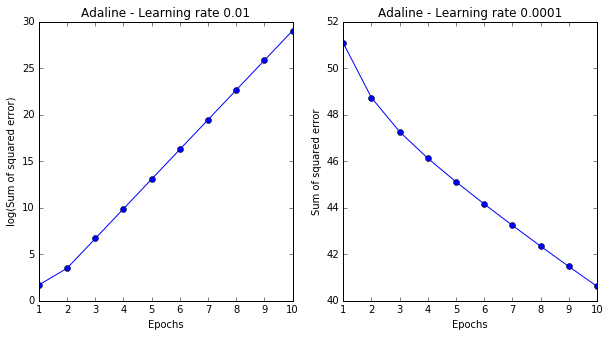

In [90]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1), 
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum of squared error)')
ax[0].set_title('Adaline - Learning rate {}'.format(ada1.eta))
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1), 
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum of squared error')
ax[1].set_title('Adaline - Learning rate {}'.format(ada2.eta));

#### Feature scaling

In [65]:
X_std = np.copy(X)
X_std = np.apply_along_axis(lambda x: (x-np.mean(x))/np.std(x), 0, X_std)

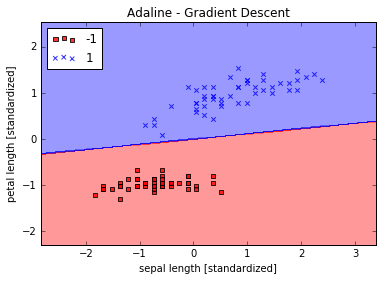

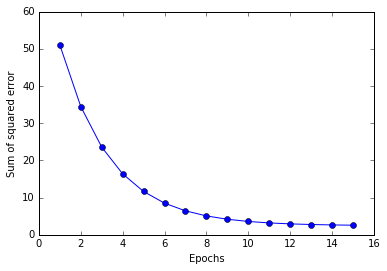

In [91]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel(iris.feature_names[0][:-4]+'[standardized]')
plt.ylabel(iris.feature_names[2][:-4]+'[standardized]')
plt.legend(loc=2)
plt.figure()
plt.plot(range(1,len(ada.cost_)+1), 
           ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum of squared error');

# Stochastic Gradient Descent

In [ ]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ----------
    eta : float
        Learning rate between 0.0 and 1.0
    n_inter : int
        Passes over the training dataset.

    Attributes
    ----------
    w_ : 1d array 
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """

    def __init__(self, eta=0.01, n_iter=50, random_seed=1):
        self.random_seed = random_seed
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_futures]
            Training vectors, where n_samples 
            is the number of samples and
            n_features is the number of features
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object
        """
#         self.w_ = np.zeros(1 + X.shape[1])
        rgen = np.random.RandomState(self.random_seed)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)


class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch
        if True to prevent cycles.
    random_state : int (default : None)
        Set randim state for shuffling
        and initializing the weights.

    """
    def __init__(self, eta=0.01, n_iter=10,
                shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi,target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)